In [3]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [4]:
cd /content/drive/MyDrive/Colab Notebooks/Carpov/Data_set/

/content/drive/MyDrive/Colab Notebooks/Carpov/Data_set


In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import matplotlib
matplotlib.rcParams['figure.figsize'] = (12, 8)

import warnings
warnings.filterwarnings('ignore')

# k Nearest Neighbors (kNN)
Метод k ближайших соседей рассчитывает расстояния от нового объекта до всех объектов выборки и, отбирая k ближайших, предсказывает целевую переменную с помощью голосования (в случае классификации) или усреднения (в случае регрессии). \
При этом этот метод можно по-разному настраивать, например можно изменить способ подсчета расстояний или способ взвешивания соседей по расстоянию. \
Для начала скачаем датасет и визуализируем данные.

In [ ]:
circ = pd.read_csv('concertriccir2.csv')
circ.head()

,X,Y,class
0,0.70,-0.247,0.0
1,-3.95,2.740,1.0
2,0.15,-2.160,1.0
3,-1.67,-0.942,1.0
4,2.56,-1.850,1.0


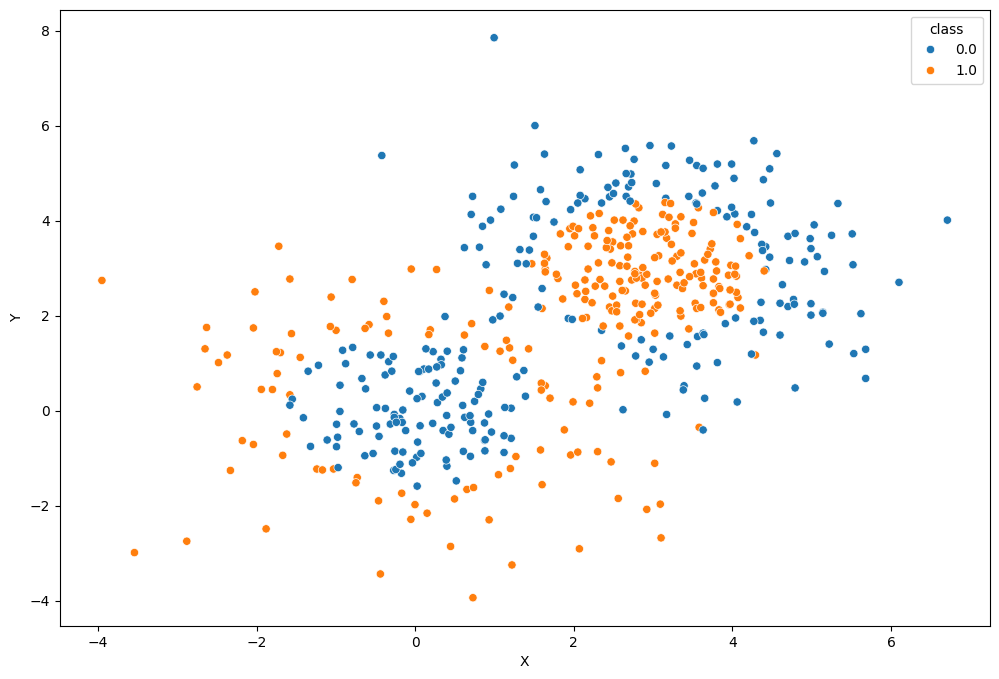

In [ ]:
sns.scatterplot(x = circ['X'], y = circ['Y'], hue=circ['class']);

**Задание 1.** Обучите логистическую регрессию на данных и нарисуйте разделяющую гиперплоскость (прямую) на рисунке с данными. Как линейный классификатор справился с задачей? Сделайте вывод исходя из геометрии данных и линии разделения. Какой accuracy выйдет на всей выборке (без валидации)?

In [ ]:
from sklearn.linear_model import LogisticRegression

### Your code is here
logit = LogisticRegression()
logit.fit(circ[['X','Y']], circ['class'])



LogisticRegression()

<Axes: title={'center': 'LR Desicion Boundary'}, xlabel='X', ylabel='Y'>

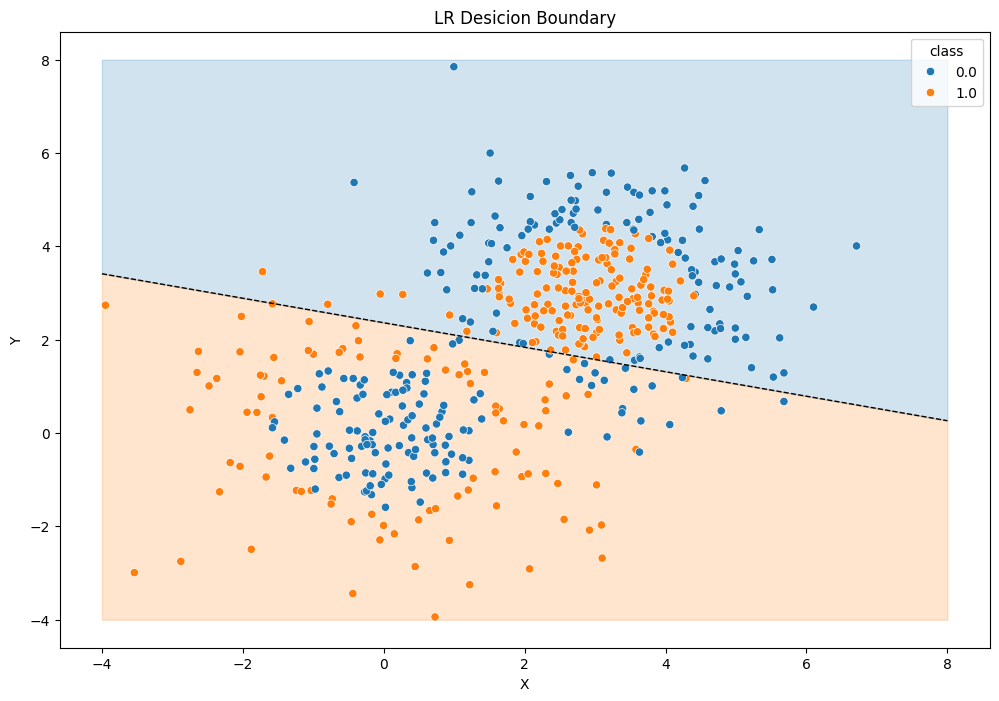

In [ ]:
b = logit.intercept_[0] # свободный коэффициент
w1, w2 = logit.coef_.T # кэфы при признаках, траспонируем из строки в столбец
# Представим нашу плоскость в виде y = m*x + c
c = -b/w2
m = -w1/w2

# сгенерируем точки
xd = np.array([-4,8])
yd = m * xd + c

# Начнем рисовать
plt.plot(xd, yd, 'k', lw = 1, ls = '--')
plt.fill_between(xd, yd, 8, color = 'tab:blue', alpha = 0.2 )
plt.fill_between(xd, yd, -4, color = 'tab:orange', alpha = 0.2)
plt.title('LR Desicion Boundary')

sns.scatterplot(x = circ['X'], y = circ['Y'], hue = circ['class'])

In [ ]:
logit.score(circ[['X','Y']], circ['class']) # accuracy модели

0.424

**Задание 2.** Разделите обучающую выборку и обучите 6 моделей kNN с различным числом соседей из `all_k`, сохраните обученные классификаторы в список. \
Выведите accuracy на тренировочной и тестовой выборке для каждой модели. Каково оптимальное число соседей с точки зрения accuracy?

In [ ]:
X = circ[['X', 'Y']].values
y = circ['class'].values.astype('int')

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2,
                                                    shuffle=True, random_state=2022)

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
all_k = [1, 3, 10, 30, 40, 60]

### Your code is here
all_clfs, acc_test, acc_train = [], [], []

for k in all_k:
  clf = KNeighborsClassifier(n_neighbors=k).fit(X_train, y_train)
  all_clfs.append(clf)

  acc_train.append(np.mean(clf.predict(X_train) == y_train))
  acc_test.append(np.mean(clf.predict(X_test) == y_test))
all_clfs


[KNeighborsClassifier(n_neighbors=1),
 KNeighborsClassifier(n_neighbors=3),
 KNeighborsClassifier(n_neighbors=10),
 KNeighborsClassifier(n_neighbors=30),
 KNeighborsClassifier(n_neighbors=40),
 KNeighborsClassifier(n_neighbors=60)]

In [ ]:
pd.DataFrame({'k': all_k,
              'acc_train': acc_train,
              'acc_test': acc_test})

,k,acc_train,acc_test
0,1,1.0000,0.89
1,3,0.9475,0.87
2,10,0.9150,0.85
3,30,0.8525,0.74
4,40,0.8000,0.75
5,60,0.6925,0.73


**Задание 3.** (бонусное) Скачайте библиотку [mlxtend](http://rasbt.github.io/mlxtend/#examples) для визуализации решающих поверхностей.
В документации можно ознакомиться с [примерами](http://rasbt.github.io/mlxtend/user_guide/plotting/plot_decision_regions/) изображения решающих поверхностей для различных моделей. \
Построим несколько таких графиков для шести обученных нами kNN.

1. Подберите параметры `gridspec.GridSpec()` и `itertools.product()` для нашего числа классификаторов.
2. Удобно перед визулизацией сохранить обученные классификаторы в список `all_clfs`.
3. Проявите терпение! Отрисовка решающих поверхностей может занимать пару минут.

In [ ]:
import mlxtend
from mlxtend.plotting import plot_decision_regions
import matplotlib.gridspec as gridspec
import itertools

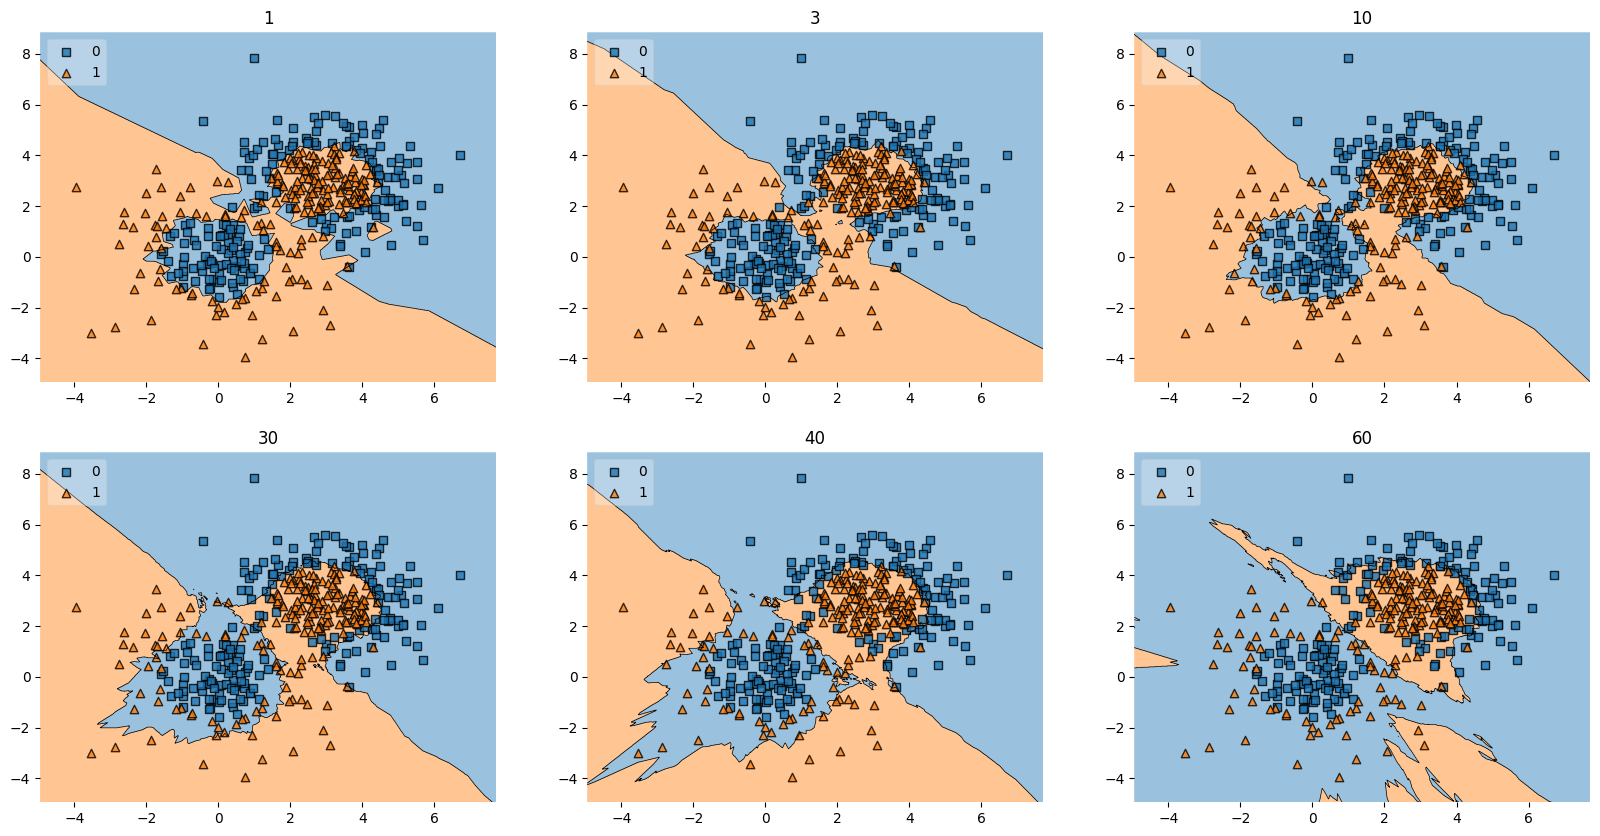

In [ ]:
gs = gridspec.GridSpec(2,3)

fig = plt.figure(figsize = (20,10))
labels = [1, 3, 10, 30, 40, 60]

for clf, lab, grd in zip(all_clfs,
                         labels,
                         itertools.product([0,1], [0,1,2])):
    ax = plt.subplot(gs[grd])
    fig = plot_decision_regions(X_train, y_train, clf = clf, legend = 2)
    plt.title(lab)

plt.show()


1. Как меняется решающая поверхность с ростом числа соседей?
2. Какое оптимальное число соседей с точки зрения устройства данных и геометрии решающих поверхностей? Поясните свой ответ, опираясь на полученные графики.
3. Лучше ли справляется kNN по сравнению с логистической регрессией?

**Задание 4.** Скачайте уже известный вам датасет [SigmaCabs](https://www.kaggle.com/datasets/arashnic/taxi-pricing-with-mobility-analytics). Обучите классификатор kNN на отнормированных и не отнормированных данных, подобрав лучшие гиперпараметры среди $k \in [1, 5, 10]$. Замерьте качество на тестовой выборке. \
Почему нормирование данных помогает улучшить качество?

In [ ]:
df = pd.read_csv('processed_sigma_cabs.csv')
df.head()

,Trip_Distance,Customer_Since_Months,Life_Style_Index,Customer_Rating,Cancellation_Last_1Month,Var1,Var2,Var3,Surge_Pricing_Type,Type_of_Cab_B,...,Destination_Type_F,Destination_Type_G,Destination_Type_H,Destination_Type_I,Destination_Type_J,Destination_Type_K,Destination_Type_L,Destination_Type_M,Destination_Type_N,Gender_Male
0,6.77,1.0,2.42769,3.90500,0,40.0,46,60,2,1,...,0,0,0,0,0,0,0,0,0,0
1,29.47,10.0,2.78245,3.45000,0,38.0,56,78,2,1,...,0,0,0,0,0,0,0,0,0,1
2,41.58,10.0,2.79805,3.50125,2,61.0,56,77,2,1,...,0,0,0,0,0,0,0,0,0,1
3,61.56,10.0,2.79805,3.45375,0,61.0,52,74,3,0,...,0,0,0,0,0,0,0,0,0,1
4,54.95,10.0,3.03453,3.40250,4,51.0,49,102,2,0,...,0,0,0,0,0,0,0,0,0,1


In [ ]:
X = df.drop('Surge_Pricing_Type', axis=1)
y = df['Surge_Pricing_Type']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2,
                                                    shuffle=True, random_state=2022)

In [ ]:
### Your code is here

all_k = [1, 5, 10]
acc_test = []

for k in all_k:
    clf = KNeighborsClassifier(n_neighbors = k).fit(X_train, y_train)
    acc_test.append(np.mean(clf.predict(X_test) == y_test))
pd.DataFrame({'k': all_k,
              'acc_test': acc_test})





,k,acc_test
0,1,0.438195
1,5,0.443170
2,10,0.470360


In [ ]:
from sklearn.preprocessing import StandardScaler

scaler =StandardScaler()
Xcs_train = scaler.fit_transform(X_train)
Xcs_test = scaler.transform(X_test)
acc_test = []
for k in all_k:
  clf = KNeighborsClassifier(n_neighbors = k).fit(Xcs_train, y_train)
  acc_test. append(np.mean(clf.predict(Xcs_test) == y_test))
pd.DataFrame({'k': all_k,
              'acc_test' : acc_test})


,k,acc_test
0,1,0.564881
1,5,0.630388
2,10,0.660768


**Задание 5.** Обучите классификатор kNN на отнормированных данных с помощью метрики Минковского.
$$
\rho(x, z) = \bigg(\sum_i |x_i - z_i|^p\bigg) ^{1/p}
$$

Значение параметра `p` возьмите равным единице. Замерьте качество на тестовой выборке и сравните с предыдущим заданием, где `p = 2`.

In [ ]:
### Your code is here
clf = KNeighborsClassifier(n_neighbors=k,
                           metric = 'minkowski',
                           p = 1).fit(Xcs_train, y_train)
clf.score(Xcs_test, y_test)




0.6611476094634109

**Задание 6.** Скачайте датасет [California Housing Prices](https://www.kaggle.com/datasets/camnugent/california-housing-prices), в котором мы будем предсказывать среднюю стоимость жилья. В качестве признаков будем использовать `['longitude', 'latitude']`, посмотрите на них с помощью scatterplot. \
По какой характеристике наш kNN регрессор в этом случае подбирает соседей?

1. Обучите обыкновенную линейную регрессию и замерьте RMSE на тренировочной и тестовой выборках.
2. Обучите kNN регрессор на отнормированных данных, подобрав лучшие гиперпараметры $k \in [1, 2, ..., 9]$.
3. Обучите kNN регрессор с гауссовским ядром, взяв параметр k из предыдущего пункта и подобрав оптимальное значение ширины окна среди предложенных $h \in np.arange(0.02, 0.1, 0.01)$.

Как ширина окна влияет на веса при усреднении ответа по соседям?

In [ ]:
df = pd.read_csv('housing.csv')
df.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY


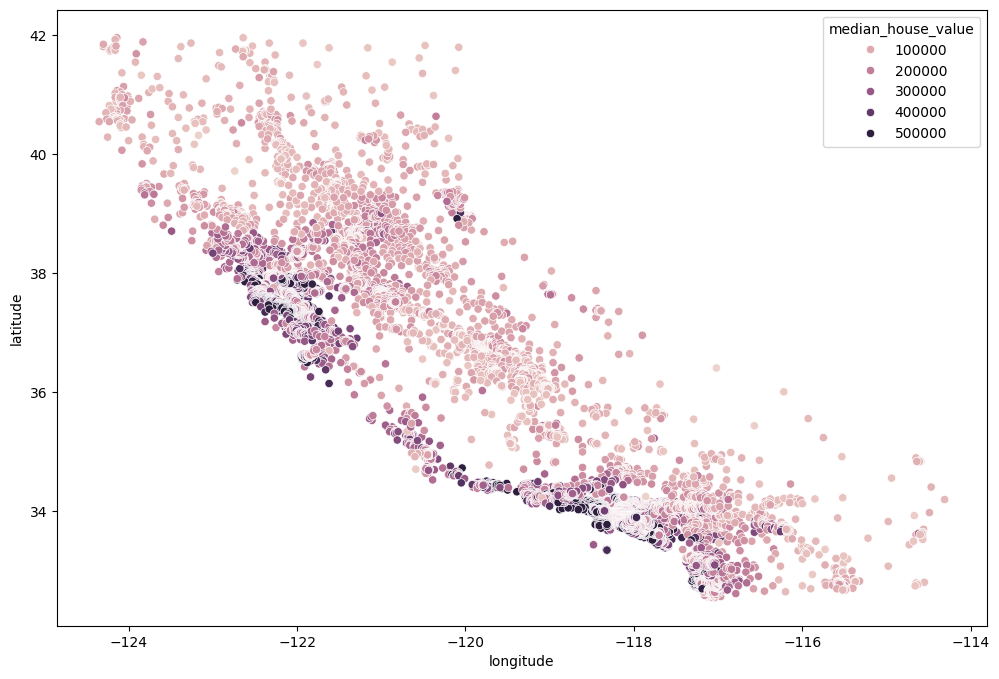

In [ ]:
X = df[['longitude', 'latitude']]
y = df['median_house_value']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2,
                                                    shuffle=True, random_state=2022)
sns.scatterplot(x = df['longitude'], y = df['latitude'], hue=y);

In [ ]:
### Your code is here
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)




In [ ]:
from sklearn.linear_model import LinearRegression
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_squared_error

lr = LinearRegression().fit(X_train, y_train)
print(f'Linreg Train RMSE: {mean_squared_error(y_train, lr.predict(X_train), squared=False).round(2)}')
print(f'Linreg Test RMSE: {mean_squared_error(y_test, lr.predict(X_test), squared=False).round(2)}')

Linreg Train RMSE: 100948.4
Linreg Test RMSE: 98369.88


In [ ]:
all_k = np.arange(1,10)
rmse_train, rmse_test = [], []

for k in all_k:
  clf = KNeighborsClassifier(n_neighbors=k).fit(X_train, y_train)
  rmse_train.append(mean_squared_error(y_train, clf.predict(X_train), squared = False).round(2))
  rmse_test.append(mean_squared_error(y_test, clf.predict(X_test), squared = False).round(2))
pd.DataFrame({'k': all_k,
              'rmse_train': rmse_train,
              'rmse_test': rmse_test})

,k,rmse_train,rmse_test
0,1,34295.11,64135.14
1,2,49572.12,64210.70
2,3,59050.55,69292.88
3,4,64741.68,73855.55
4,5,69781.20,76755.28
5,6,73839.37,79321.79
6,7,76287.32,81695.76
7,8,78525.36,83891.46
8,9,80952.17,86313.09


In [ ]:

rmse_test, rmse_train = [], []

for h in np.arange(0.02, 0.1, 0.01):
    def gaussian_kernel(distances, h=h):
        return np.exp(- distances**2 / h**2)

    knn = KNeighborsRegressor(n_neighbors=7, weights=gaussian_kernel)
    knn.fit(X_train, y_train)

    rmse_train.append(mean_squared_error(y_train, knn.predict(X_train), squared=False).round(2))
    rmse_test.append(mean_squared_error(y_test, knn.predict(X_test), squared=False).round(2))


pd.DataFrame({'h' : np.arange(0.02, 0.1, 0.01),
              'RMSE Train' : rmse_train,
              'RMSE Test' : rmse_test})

,h,RMSE Train,RMSE Test
0,0.02,41792.96,52380.02
1,0.03,43084.75,52350.14
2,0.04,43720.15,52354.61
3,0.05,44082.37,52382.57
4,0.06,44306.37,52406.49
5,0.07,44457.22,52423.57
6,0.08,44568.91,52436.35
7,0.09,44657.68,52446.82
